# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [1]:
vocabulario=set()
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
for doc in documents:
    for word in doc.lower().strip(".").split(sep=" "):
        vocabulario.add(word)
# Imprimir el vocabulario
print(vocabulario)
print(len(vocabulario))

dic_tf={}
i=0
for doc in documents:
    dict_tfd={}
    for term in vocabulario:
        
        count= doc.lower().strip(".").count(term)
        dict_tfd[term]=count
    #print(doc,dict_tfd)
    dic_tf[i]=dict_tfd
    i+=1
print(dic_tf)    
            

{'se', 'en', 'jugaron', 'cama', 'estaba', 'cómoda', 'la', 'gato', 'el', 'es', 'importante', 'perro', 'jardín', 'escondió', 'de', 'y', 'debajo', 'limpieza', 'del', 'limpia'}
20
{0: {'se': 1, 'en': 0, 'jugaron': 0, 'cama': 1, 'estaba': 0, 'cómoda': 0, 'la': 1, 'gato': 1, 'el': 1, 'es': 1, 'importante': 0, 'perro': 0, 'jardín': 0, 'escondió': 1, 'de': 2, 'y': 0, 'debajo': 1, 'limpieza': 0, 'del': 0, 'limpia': 0}, 1: {'se': 0, 'en': 0, 'jugaron': 0, 'cama': 1, 'estaba': 1, 'cómoda': 1, 'la': 1, 'gato': 0, 'el': 0, 'es': 1, 'importante': 0, 'perro': 0, 'jardín': 0, 'escondió': 0, 'de': 0, 'y': 1, 'debajo': 0, 'limpieza': 0, 'del': 0, 'limpia': 1}, 2: {'se': 0, 'en': 1, 'jugaron': 1, 'cama': 0, 'estaba': 0, 'cómoda': 0, 'la': 0, 'gato': 1, 'el': 3, 'es': 0, 'importante': 0, 'perro': 1, 'jardín': 1, 'escondió': 0, 'de': 0, 'y': 1, 'debajo': 0, 'limpieza': 0, 'del': 0, 'limpia': 0}, 3: {'se': 0, 'en': 0, 'jugaron': 0, 'cama': 0, 'estaba': 0, 'cómoda': 0, 'la': 1, 'gato': 0, 'el': 1, 'es': 1, '

In [2]:

import pandas as pd
matriz=pd.DataFrame(dic_tf)
matriz.T

,se,en,jugaron,cama,estaba,cómoda,la,gato,el,es,importante,perro,jardín,escondió,de,y,debajo,limpieza,del,limpia
0,1,0,0,1,0,0,1,1,1,1,0,0,0,1,2,0,1,0,0,0
1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,1,1,0,0,0,0,1,3,0,0,1,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1,0


In [ ]:
# Calcular IDF y TF-IDF
# Número de documentos
from math import log


N = len(documents)  
# Calcular IDF para cada término
idf = {}
for term in vocabulario:
    # Contar en cuántos documentos aparece el término
    doc_count = sum(1 for i in range(N) if dic_tf[i][term] > 0) 
    # Aplicar fórmula IDF
    idf[term] = log(N / (doc_count)) if doc_count > 0 else 0

print("\nValores IDF:")
print(idf)
# Calcular TF-IDF
dict_tfidf = {}
for i in range(N):  
    dict_tfidf[i] = {}
    for term in vocabulario:
        dict_tfidf[i][term] = dic_tf[i][term] * idf[term]

# Crear DataFrame TF-IDF
matriz_tfidf = pd.DataFrame(dict_tfidf)
matriz_tfidf.T


Valores IDF:
{'se': 1.3862943611198906, 'en': 1.3862943611198906, 'jugaron': 1.3862943611198906, 'cama': 0.6931471805599453, 'estaba': 1.3862943611198906, 'cómoda': 1.3862943611198906, 'la': 0.28768207245178085, 'gato': 0.6931471805599453, 'el': 0.28768207245178085, 'es': 0.28768207245178085, 'importante': 1.3862943611198906, 'perro': 1.3862943611198906, 'jardín': 0.6931471805599453, 'escondió': 1.3862943611198906, 'de': 0.6931471805599453, 'y': 0.6931471805599453, 'debajo': 1.3862943611198906, 'limpieza': 1.3862943611198906, 'del': 1.3862943611198906, 'limpia': 1.3862943611198906}


,se,en,jugaron,cama,estaba,cómoda,la,gato,el,es,importante,perro,jardín,escondió,de,y,debajo,limpieza,del,limpia
0,1.386294,0.000000,0.000000,0.693147,0.000000,0.000000,0.287682,0.693147,0.287682,0.287682,0.000000,0.000000,0.000000,1.386294,1.386294,0.000000,1.386294,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.693147,1.386294,1.386294,0.287682,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,1.386294
2,0.000000,1.386294,1.386294,0.000000,0.000000,0.000000,0.000000,0.693147,0.863046,0.000000,0.000000,1.386294,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287682,0.000000,0.287682,0.287682,1.386294,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,1.386294,1.386294,0.000000


In [4]:
matriz.to_csv("matriz.csv", sep=",", index=True)

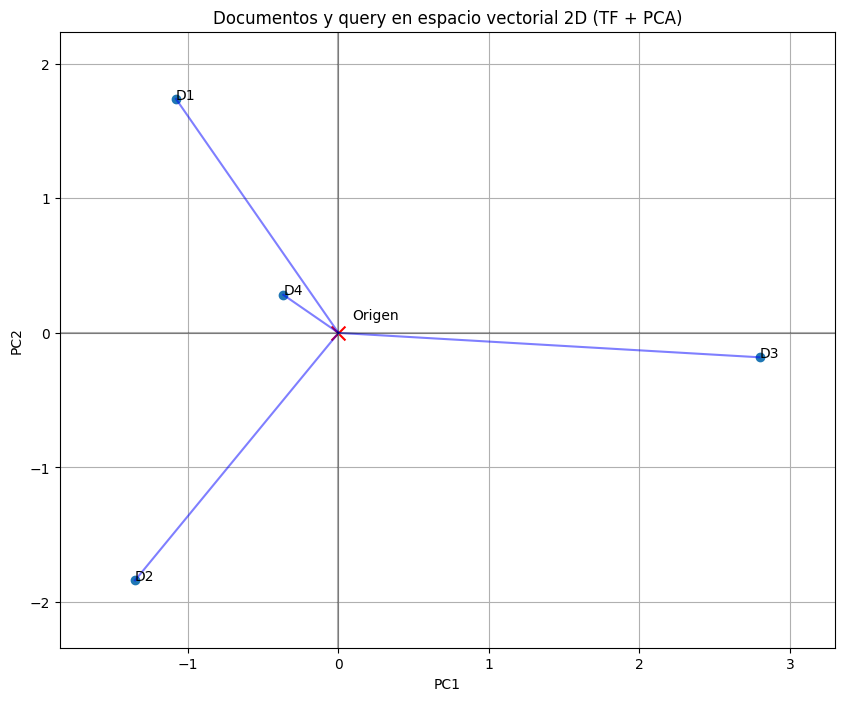

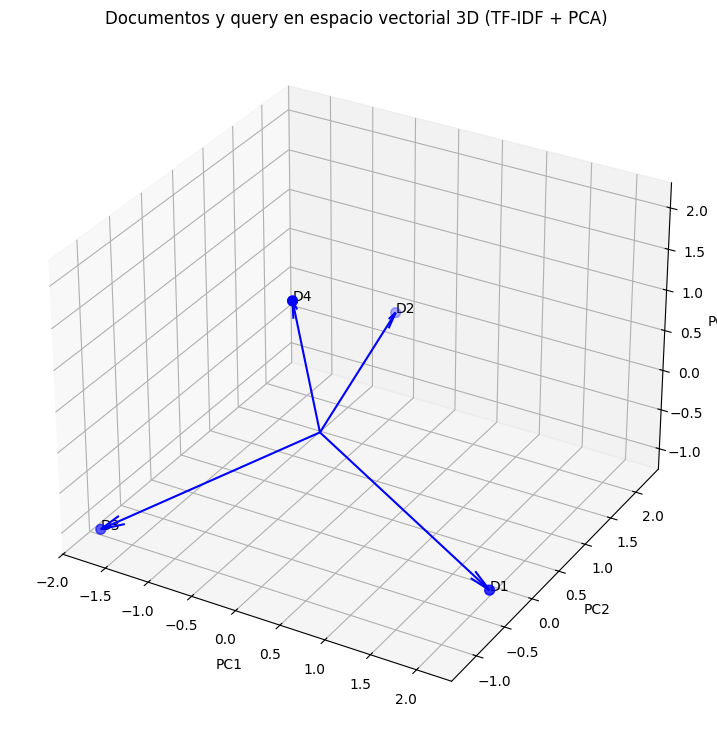

In [5]:

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
# Representación TF

# Representación TF-IDF

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d


# Crear gráfico para TF
plt.figure(figsize=(10, 8))
# Dibujar líneas desde el origen a cada punto
for i in range(len(docs_2d)):
    plt.plot([0, docs_2d[i,0]], [0, docs_2d[i,1]], 'b-', alpha=0.5)
# Dibujar puntos
plt.scatter(docs_2d[:,0], docs_2d[:,1])
# Etiquetar puntos
labels = ["D1", "D2", "D3", "D4"]
for i, txt in enumerate(labels):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
# Dibujar origen
plt.scatter([0], [0], color='red', s=100, marker='x')
plt.annotate("Origen", (0, 0), xytext=(10, 10), textcoords='offset points')
# Ajustar el gráfico
plt.title("Documentos y query en espacio vectorial 2D (TF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
# Ajustar límites
margin = 0.5
x_min, x_max = min(docs_2d[:,0]), max(docs_2d[:,0])
y_min, y_max = min(docs_2d[:,1]), max(docs_2d[:,1])
plt.xlim(min(-margin, x_min - margin), max(margin, x_max + margin))
plt.ylim(min(-margin, y_min - margin), max(margin, y_max + margin))
plt.show()

# Reducción PCA y visualización 2D con TF-IDF
pca_tfidf = PCA(n_components=2)
docs_2d_tfidf = pca_tfidf.fit_transform(matriz_tfidf.T)

# Reducimos la dimensionalidad a 3 con PCA
pca_tfidf_3d = PCA(n_components=3)
docs_3d_tfidf = pca_tfidf_3d.fit_transform(matriz_tfidf.T)

# Crear figura 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Dibujar flechas desde el origen
for i in range(len(docs_3d_tfidf)):
    x, y, z = docs_3d_tfidf[i]
    # Flecha desde el origen
    ax.quiver(0, 0, 0, x, y, z, color='blue', arrow_length_ratio=0.1)

# Dibujar los puntos al final de cada flecha
ax.scatter(docs_3d_tfidf[:, 0], docs_3d_tfidf[:, 1], docs_3d_tfidf[:, 2], color='blue', s=50)

# Etiquetas para cada punto
labels = ["D1", "D2", "D3", "D4"]
for i, txt in enumerate(labels):
    x, y, z = docs_3d_tfidf[i]
    ax.text(x, y, z, txt, size=10)

# Ejes y título
ax.set_title("Documentos y query en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()
# Reducción PCA y visualización 3D

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from math import log
from mpl_toolkits.mplot3d import Axes3D

documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
query = "gato"
all_docs = documents + [query]

# Extraer vocabulario
vocabulario = set()
for doc in all_docs:
    for word in doc.lower().strip('.').split():
        vocabulario.add(word)
        
print("Vocabulario:", vocabulario)
print("Número de términos:", len(vocabulario))

# Crear matriz TF
dict_tf = {}
for i, doc in enumerate(all_docs, 1):
    dict_tfd = {}
    for term in vocabulario:
        
        words = doc.lower().strip('.').split()
        count = words.count(term)
        dict_tfd[term] = count
    
    print(f"Documento {i}:", dict_tfd)
    dict_tf[i] = dict_tfd

# Crear DataFrame TF
matriz_tf = pd.DataFrame(dict_tf)
matriz_tf.T





Vocabulario: {'se', 'en', 'jugaron', 'cama', 'estaba', 'cómoda', 'la', 'gato', 'el', 'es', 'importante', 'perro', 'jardín', 'escondió', 'de', 'y', 'debajo', 'limpieza', 'del', 'limpia'}
Número de términos: 20
Documento 1: {'se': 1, 'en': 0, 'jugaron': 0, 'cama': 1, 'estaba': 0, 'cómoda': 0, 'la': 1, 'gato': 1, 'el': 1, 'es': 0, 'importante': 0, 'perro': 0, 'jardín': 0, 'escondió': 1, 'de': 1, 'y': 0, 'debajo': 1, 'limpieza': 0, 'del': 0, 'limpia': 0}
Documento 2: {'se': 0, 'en': 0, 'jugaron': 0, 'cama': 1, 'estaba': 1, 'cómoda': 1, 'la': 1, 'gato': 0, 'el': 0, 'es': 0, 'importante': 0, 'perro': 0, 'jardín': 0, 'escondió': 0, 'de': 0, 'y': 1, 'debajo': 0, 'limpieza': 0, 'del': 0, 'limpia': 1}
Documento 3: {'se': 0, 'en': 1, 'jugaron': 1, 'cama': 0, 'estaba': 0, 'cómoda': 0, 'la': 0, 'gato': 1, 'el': 3, 'es': 0, 'importante': 0, 'perro': 1, 'jardín': 1, 'escondió': 0, 'de': 0, 'y': 1, 'debajo': 0, 'limpieza': 0, 'del': 0, 'limpia': 0}
Documento 4: {'se': 0, 'en': 0, 'jugaron': 0, 'cama':

,se,en,jugaron,cama,estaba,cómoda,la,gato,el,es,importante,perro,jardín,escondió,de,y,debajo,limpieza,del,limpia
1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0
2,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,1,1,0,0,0,0,1,3,0,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:

# Calcular IDF y TF-IDF
# Número de documentos
N = len(all_docs)
# Calcular IDF para cada término
idf = {}
for term in vocabulario:
    # Contar en cuántos documentos aparece el término
    doc_count = sum(1 for i in range(1, N+1) if dict_tf[i][term] > 0)
    # Aplicar fórmula IDF
    idf[term] = log(N / (doc_count)) if doc_count > 0 else 0

print("\nValores IDF:")
print(idf)
# Calcular TF-IDF
dict_tfidf = {}
for i in range(1, N+1):
    dict_tfidf[i] = {}
    for term in vocabulario:
        dict_tfidf[i][term] = dict_tf[i][term] * idf[term]

# Crear DataFrame TF-IDF
matriz_tfidf = pd.DataFrame(dict_tfidf)
matriz_tfidf.T


Valores IDF:
{'se': 1.6094379124341003, 'en': 1.6094379124341003, 'jugaron': 1.6094379124341003, 'cama': 0.9162907318741551, 'estaba': 1.6094379124341003, 'cómoda': 1.6094379124341003, 'la': 0.5108256237659907, 'gato': 0.5108256237659907, 'el': 0.9162907318741551, 'es': 1.6094379124341003, 'importante': 1.6094379124341003, 'perro': 1.6094379124341003, 'jardín': 0.9162907318741551, 'escondió': 1.6094379124341003, 'de': 1.6094379124341003, 'y': 0.9162907318741551, 'debajo': 1.6094379124341003, 'limpieza': 1.6094379124341003, 'del': 1.6094379124341003, 'limpia': 1.6094379124341003}


,se,en,jugaron,cama,estaba,cómoda,la,gato,el,es,importante,perro,jardín,escondió,de,y,debajo,limpieza,del,limpia
1,1.609438,0.000000,0.000000,0.916291,0.000000,0.000000,0.510826,0.510826,0.916291,0.000000,0.000000,0.000000,0.000000,1.609438,1.609438,0.000000,1.609438,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.916291,1.609438,1.609438,0.510826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.916291,0.000000,0.000000,0.000000,1.609438
3,0.000000,1.609438,1.609438,0.000000,0.000000,0.000000,0.000000,0.510826,2.748872,0.000000,0.000000,1.609438,0.916291,0.000000,0.000000,0.916291,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510826,0.000000,0.000000,1.609438,1.609438,0.000000,0.916291,0.000000,0.000000,0.000000,0.000000,1.609438,1.609438,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


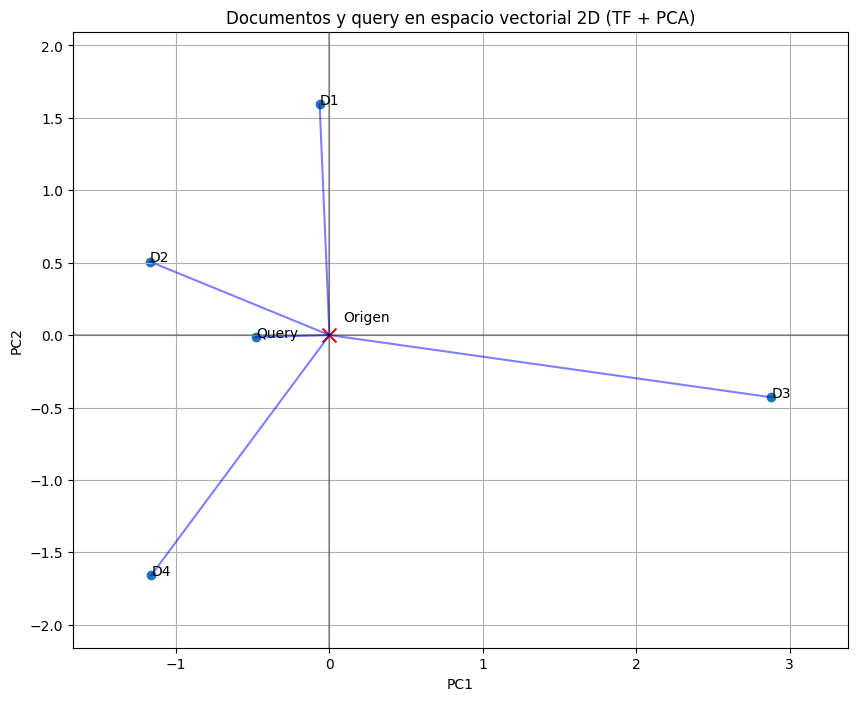

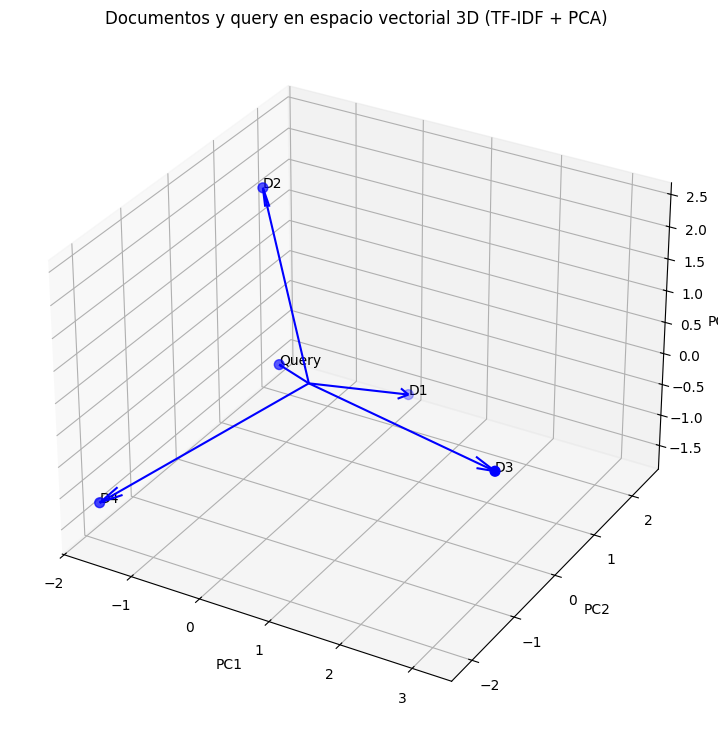


Similitud coseno entre la query y los documentos (TF-IDF):
  Documento                                     Texto  Similitud
0        D1    El gato se escondió debajo de la cama.   0.144125
2        D3  El perro y el gato jugaron en el jardín.   0.122931
1        D2           La cama estaba limpia y cómoda.   0.000000
3        D4     La limpieza del jardín es importante.   0.000000


In [8]:

# Reducción PCA y visualización 2D con TF
pca_tf = PCA(n_components=2)
docs_2d_tf = pca_tf.fit_transform(matriz_tf.T)

# Crear gráfico para TF
plt.figure(figsize=(10, 8))
# Dibujar líneas desde el origen a cada punto
for i in range(len(docs_2d_tf)):
    plt.plot([0, docs_2d_tf[i,0]], [0, docs_2d_tf[i,1]], 'b-', alpha=0.5)
# Dibujar puntos
plt.scatter(docs_2d_tf[:,0], docs_2d_tf[:,1])
# Etiquetar puntos
labels = ["D1", "D2", "D3", "D4", "Query"]
for i, txt in enumerate(labels):
    plt.annotate(txt, (docs_2d_tf[i,0], docs_2d_tf[i,1]))
# Dibujar origen
plt.scatter([0], [0], color='red', s=100, marker='x')
plt.annotate("Origen", (0, 0), xytext=(10, 10), textcoords='offset points')
# Ajustar el gráfico
plt.title("Documentos y query en espacio vectorial 2D (TF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
# Ajustar límites
margin = 0.5
x_min, x_max = min(docs_2d_tf[:,0]), max(docs_2d_tf[:,0])
y_min, y_max = min(docs_2d_tf[:,1]), max(docs_2d_tf[:,1])
plt.xlim(min(-margin, x_min - margin), max(margin, x_max + margin))
plt.ylim(min(-margin, y_min - margin), max(margin, y_max + margin))
plt.show()

# Reducción PCA y visualización 2D con TF-IDF
pca_tfidf = PCA(n_components=2)
docs_2d_tfidf = pca_tfidf.fit_transform(matriz_tfidf.T)

# Reducimos la dimensionalidad a 3 con PCA
pca_tfidf_3d = PCA(n_components=3)
docs_3d_tfidf = pca_tfidf_3d.fit_transform(matriz_tfidf.T)

# Crear figura 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Dibujar flechas desde el origen
for i in range(len(docs_3d_tfidf)):
    x, y, z = docs_3d_tfidf[i]
    # Flecha desde el origen
    ax.quiver(0, 0, 0, x, y, z, color='blue', arrow_length_ratio=0.1)

# Dibujar los puntos al final de cada flecha
ax.scatter(docs_3d_tfidf[:, 0], docs_3d_tfidf[:, 1], docs_3d_tfidf[:, 2], color='blue', s=50)

# Etiquetas para cada punto
labels = ["D1", "D2", "D3", "D4", "Query"]
for i, txt in enumerate(labels):
    x, y, z = docs_3d_tfidf[i]
    ax.text(x, y, z, txt, size=10)

# Ejes y título
ax.set_title("Documentos y query en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()
# Calcular similitud coseno entre la query y los documentos usando TF-IDF
from sklearn.metrics.pairwise import cosine_similarity

# Extraer vectores (excluyendo la query de la matriz)
vector_query = matriz_tfidf[5].values.reshape(1, -1)  # Query es el documento 5
vectores_docs = matriz_tfidf.iloc[:, :4].T.values  # Documentos 1-4

# Calcular similitud
similitudes = cosine_similarity(vector_query, vectores_docs)[0]

# Crear DataFrame para los resultados
df_similitudes = pd.DataFrame({
    'Documento': [f"D{i+1}" for i in range(4)],
    'Texto': documents,
    'Similitud': similitudes
})

# Ordenar por similitud descendente
df_similitudes = df_similitudes.sort_values('Similitud', ascending=False)

print("\nSimilitud coseno entre la query y los documentos (TF-IDF):")
print(df_similitudes)

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

Ranking de documentos relevantes:

  Documento                                     Texto  Similitud
0        D1    El gato se escondió debajo de la cama.   0.268987
2        D3  El perro y el gato jugaron en el jardín.   0.212231
1        D2           La cama estaba limpia y cómoda.   0.000000
3        D4     La limpieza del jardín es importante.   0.000000


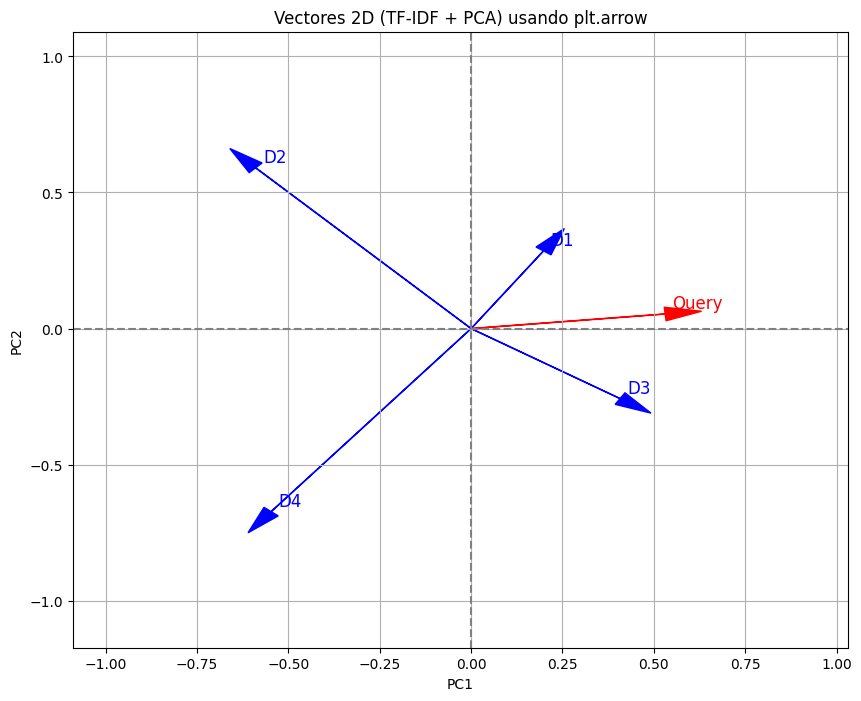

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# 1. Documentos originales
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# 2. Consulta personalizada
query = "gato"

# 3. Construir matriz TF-IDF
vectorizer = TfidfVectorizer()
all_docs = documents + [query]
matriz_tfidf = vectorizer.fit_transform(all_docs).toarray()

# 4. Similitud del coseno
vector_query = matriz_tfidf[-1].reshape(1, -1)
vectores_docs = matriz_tfidf[:-1]
similitudes = cosine_similarity(vector_query, vectores_docs)[0]

# Mostrar ranking
df_sim = pd.DataFrame({
    "Documento": [f"D{i+1}" for i in range(len(documents))],
    "Texto": documents,
    "Similitud": similitudes
}).sort_values("Similitud", ascending=False)

print("Ranking de documentos relevantes:\n")
print(df_sim)

# 5. Reducción a 2D para graficar
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz_tfidf)
x_vals, y_vals = docs_2d[:, 0], docs_2d[:, 1]

# 6. Graficar con flechas usando plt.arrow
plt.figure(figsize=(10, 8))
for i in range(len(documents)):
    plt.arrow(0, 0, x_vals[i], y_vals[i], head_width=0.05, head_length=0.1, fc='blue', ec='blue')
    plt.text(x_vals[i]+0.02, y_vals[i]+0.02, f"D{i+1}", fontsize=12, color='blue')

# Consulta (último vector) en rojo
plt.arrow(0, 0, x_vals[-1], y_vals[-1], head_width=0.05, head_length=0.1, fc='red', ec='red')
plt.text(x_vals[-1]+0.02, y_vals[-1]+0.02, "Query", fontsize=12, color='red')

# Ejes y estilo
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Vectores 2D (TF-IDF + PCA) usando plt.arrow")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.xlim(min(x_vals)-0.5, max(x_vals)+0.5)
plt.ylim(min(y_vals)-0.5, max(y_vals)+0.5)
plt.show()
